# Question 1
Romberg Method of Numerical Integration

In [1]:
import numpy as np

def trapezoidal(f,a,b,n):                                                             #n is no. of divisions not points
    h=(b-a)/n
    x=np.linspace(a,b,n+1)
    y=f(x)
    return (h/2)*(y[0]+2*np.sum(y[1:-1])+y[-1])

def romberg(f,a,b,tol):
    R=[[trapezoidal(f,a,b,1)]]                                                          #Initializing List with 1st element R[0][0]. Using list so that the size dynamically grows with parallel loops top to bottom and left to right
    
    #Calculation of recurrence table
    i=1
    while True:
        R.append([trapezoidal(f,a,b,2**i)])
        
        for j in range(1,i+1):
            R[i].append(R[i][j-1]+(1/(4**j-1))*(R[i][j-1]-R[i-1][j-1]))     #Filling columns (j) for a given row (i)
        
        #Printing of recurrence table and breaking   
        if abs(R[i][i]-R[i-1][i-1])<tol:
            
            print("The recurrence table is: " )
            for a in range(len(R)):
                for b in range(a+1):
                    print(format(R[a][b],'10.4f'), end=' ')
                print()
    
            return R[i][i]                                                                     #breaks with return statement
        
        i+=1

f=lambda x: np.sin(x)
a,b=0,np.pi
result=romberg(f,a,b,tol=1e-10)
print("The integration using Romberg method evaluates as :",format(result,'0.4f'))

The recurrence table is: 
    0.0000 
    1.5708     2.0944 
    1.8961     2.0046     1.9986 
    1.9742     2.0003     2.0000     2.0000 
    1.9936     2.0000     2.0000     2.0000     2.0000 
    1.9984     2.0000     2.0000     2.0000     2.0000     2.0000 
    1.9996     2.0000     2.0000     2.0000     2.0000     2.0000     2.0000 
The integration using Romberg method evaluates as : 2.0000


# Question 2
Gaussian Quadrature method for numerical integration for 5 data points

In [1]:
import numpy as np
from scipy.interpolate import interp1d
import sys
sys.path.append('/home/tux_blue/Documents/GitHub/Computational-Physics-PG/Assignments/Assignment Lab 7/ipynb file')
import Q2_bisect 

def legendre_poly(n,x):     #Computing Legendre polynomial P_n(x) using its recurrence relation but through iteration
    if n==0:
        return 1
    elif n==1:
        return x
    else:
        P0,P1=1,x                                                            #Base cases
        for k in range(2,n+1):
            Pn=((2*k-1)*x*P1-(k-1)*P0)/k
            P0,P1=P1,Pn  
        return Pn
    
def legendre_poly_derivative(n,x):   #recurrence relation involving derivative of Legendre Polynomial
    Pn= legendre_poly(n,x)
    Pn_1=legendre_poly(n-1,x)
    return n/(x**2-1)*(x*Pn-Pn_1)
    
def nodes_and_weights(n):
    nodes=Q2_bisect.root_search(lambda x:legendre_poly(n,x))    #We have to use function reference, otherwise x is not defined. If we use x, values will be passed instead of function (premature evaluation). lambda() is made to take only one argument x, which is used alone in the f() inside root_search() itself. n is binded with x and it is not registered as 2nd argument  
    weights=2/((1-nodes**2)*(legendre_poly_derivative(n,nodes)**2))
    return nodes,weights
    
  
x=np.array([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi])
y=np.array([1.0000,0.3431,0.2500,0.3431,1.0000])
f=interp1d(x,y)

def gauss_quadrature(f,a,b,n):
    nodes,weights=nodes_and_weights(n)
    integral=0
    for i in range(n):
        t=(b-a)/2*nodes[i]+(a+b)/2
        integral=integral+(weights[i])*f(t)
    integral=integral*(b-a)/2
    return integral
    
result=gauss_quadrature(f,0,np.pi,100)
print("The integral using Gaussian_Quadrature method is :", format(result,'0.4f'))

The integral using Gaussian_Quadrature method is : 1.5209


# Question 3a
Plot of Harmonic Oscillator Wavefunctions using user defined Hermite Polynomial

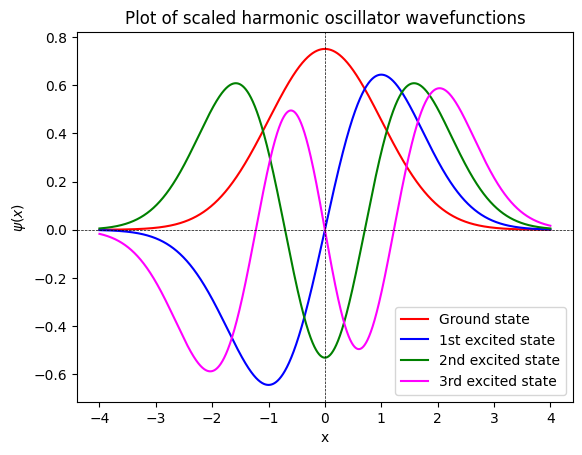

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math


def H(n,x):     #Computing Hermite polynomial H_n(x) using its recurrence relation but through iteration
    if n==0:
        return 1
    elif n==1:
        return 2*x
    else:
        H0,H1=1,2*x                                                            #Base cases
        for k in range(2,n+1):
            Hn=2*x*H1-2*(k-1)*H0
            H0,H1=H1,Hn  
        return Hn
        
x=np.linspace(-4,4,10000)
def psi(n,x):
	return 1/np.sqrt(2**n*math.factorial(n)*np.pi**0.5)*np.exp(-x**2/2)*H(n,x)

plt.plot(x,psi(0,x),'red',label='Ground state')
plt.plot(x,psi(1,x),'blue',label='1st excited state')
plt.plot(x,psi(2,x),'green',label='2nd excited state')
plt.plot(x,psi(3,x),'magenta',label='3rd excited state')
plt.legend()
plt.axvline(x=0,color='black',linestyle='--',linewidth='0.5')
plt.axhline(y=0,color='black',linestyle='--',linewidth='0.5')
plt.xlabel('x')
plt.ylabel(r'$\psi(x)$')
plt.title('Plot of scaled harmonic oscillator wavefunctions')
plt.savefig('/home/tux_blue/Documents/GitHub/Computational-Physics-PG/Assignments/Assignment Lab 7/ipynb file/SHO_Wavefunction.png')
plt.show()

# Question 3b
Plot of Harmonic Oscillator Wavefunctions using user defined Hermite Polynomial

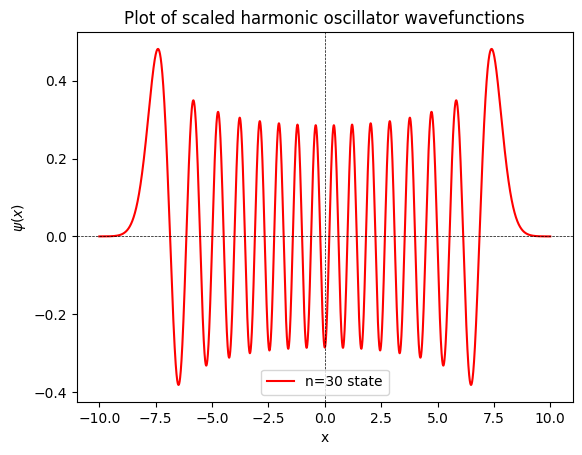

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math


def H(n,x):     #Computing Hermite polynomial H_n(x) using its recurrence relation but through iteration
    if n==0:
        return 1
    elif n==1:
        return 2*x
    else:
        H0,H1=1,2*x                                                            #Base cases
        for k in range(2,n+1):
            Hn=2*x*H1-2*(k-1)*H0
            H0,H1=H1,Hn  
        return Hn
        
x=np.linspace(-10,10,10000)
def psi(n,x):
	return 1/np.sqrt(2**n*math.factorial(n)*np.pi**0.5)*np.exp(-x**2/2)*H(n,x)
    
plt.plot(x,psi(30,x),'red',label='n=30 state')
plt.legend()
plt.axvline(x=0,color='black',linestyle='--',linewidth='0.5')
plt.axhline(y=0,color='black',linestyle='--',linewidth='0.5')
plt.xlabel('x')
plt.ylabel(r'$\psi(x)$')
plt.title('Plot of scaled harmonic oscillator wavefunctions')
plt.savefig('/home/tux_blue/Documents/GitHub/Computational-Physics-PG/Assignments/Assignment Lab 7/ipynb file/SHO_30.png')
plt.show()

# Question 3c
Evaluation of uncertainity for a given Harmonic Oscillator State

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.legendre import leggauss
import math


def H(n,x):     #Computing Hermite polynomial H_n(x) using its recurrence relation but through iteration
    if n==0:
        return 1
    elif n==1:
        return 2*x
    else:
        H0,H1=1,2*x                                                            #Base cases
        for k in range(2,n+1):
            Hn=2*x*H1-2*(k-1)*H0
            H0,H1=H1,Hn  
        return Hn
        
def psi(n,x):
	return 1/np.sqrt(2**n*math.factorial(n)*np.pi**0.5)*np.exp(-x**2/2)*H(n,x)
	
	
node,weight=leggauss(100)
Sum=0.0
n=5
a,b=-10,10
for i in range(100):
    x=node[i]*(b-a)/2+(a+b)/2
    Sum=Sum+weight[i]*(x*psi(n,x))**2    #evaluating the n-point Gaussian quadrature sum by changing x into t
Sum*=(b-a)/2
result=np.sqrt(Sum)

print('The uncertainity for n =',n,'is :',format(result,'0.3f'))   

The uncertainity for n = 5 is : 2.345


# Question 4
Adaptive Trapezoidal Rule (Local Refinement) (Depth 1st approach)

In [8]:
import numpy as np

def trapezoidal(f,a,b,n):
    h=(b-a)/n
    x=np.linspace(a,b,n+1)
    y=f(x)
    return (h/2)*(y[0]+2*sum(y[1:-1])+y[-1])

def adaptive_trapezoidal(f,a,b,tol=1e-6,min_step=1e-12):
    intervals=[(a,b)]           #This stores the range of integration (sub-intervals) within a tuple inside a list. This stack will get dynamically updated
    integral=0 

    while intervals:            #The loop will initiate only if intervals is filled
        a,b=intervals.pop()     #Remove the last element of stack i.e the tuple of interval and assign variables to it for current interval of processing
        mid=(a+b)/2  
        I_coarse=trapezoidal(f,a,b,1)  
        I_fine=trapezoidal(f,a,mid,1)+trapezoidal(f,mid,b,1)  

        error=abs(I_fine-I_coarse)/3  
        if error<tol or abs(b-a)<min_step:   #Local convergence check for a given sub-interval (a,b)
            integral+=I_fine                 #Add the area of this trapezoid in (a,b) to integral
        else:
            intervals.append((a,mid))       #Subdivide further to check for convergence of these new intervals from rightmost to leftmost over next iterations
            intervals.append((mid,b))
            
    return integral

    
fx=lambda x:np.cos(np.pi*x/2)
fy=lambda y:np.cos(np.pi*y/2)
result=adaptive_trapezoidal(fx,-1,1)*adaptive_trapezoidal(fy,-1,1)
print("The value of integral using Adaptive Trapezoidal Integral is :",format(result,'0.4f'))

The value of integral using Adaptive Trapezoidal Integral is : 1.6211
